# Home Loan Approval Classification

Problem Statement
* About Company
* Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

* Problem
* The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('loan_sanction_train.csv')
df_test = pd.read_csv('loan_sanction_test.csv')

In [3]:
df_train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
df_test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [5]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

In [6]:
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [7]:
df = df_train.append(df_test)
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1640\3394615110.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


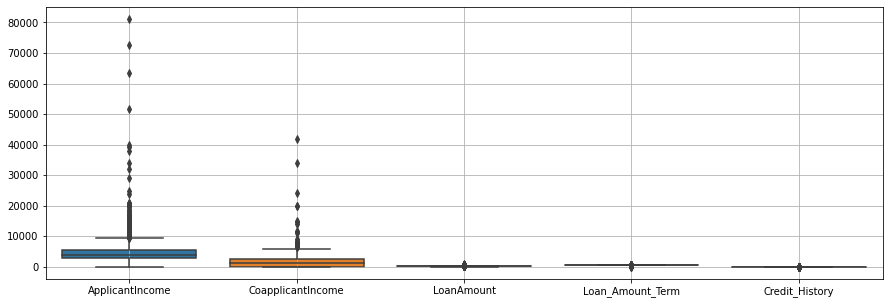

In [9]:
#Detecting outliers
plt.figure(figsize= [15,5])
sns.boxplot(data = df)
plt.style.use('ggplot')
plt.grid()

In [10]:
def detect_outlier(col):

    outliers = []
    threshold = 3                       
    mean = np.mean(col)
    std = np.std(col)
    
    for i in col : 
        z_score = (i - mean) / std            
        if np.abs(z_score) > threshold :
            outliers.append(i)
    return outliers

In [11]:
detect_outlier(df['ApplicantIncome'])

[23803,
 39999,
 51763,
 33846,
 39147,
 63337,
 81000,
 37719,
 72529,
 32000,
 24797,
 29167]

In [12]:
detect_outlier(df['LoanAmount'])

[650.0,
 600.0,
 700.0,
 495.0,
 436.0,
 480.0,
 376.0,
 490.0,
 570.0,
 380.0,
 405.0,
 500.0,
 480.0,
 480.0,
 400.0,
 600.0,
 496.0,
 390.0,
 550.0,
 412.0,
 460.0]

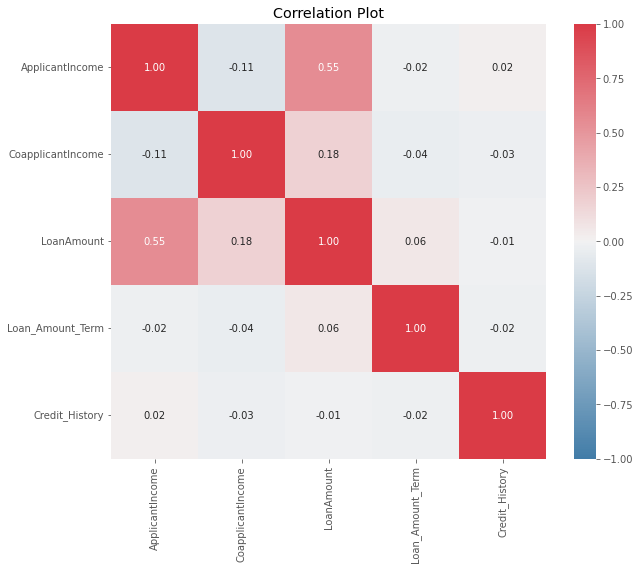

In [13]:
# Finding Correlation Between features
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True),
            annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, ax=ax)

# Add title to the plot
ax.set_title('Correlation Plot')

# Show the plot
plt.show()

In [14]:
#Handling Missing Values
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

<AxesSubplot:>

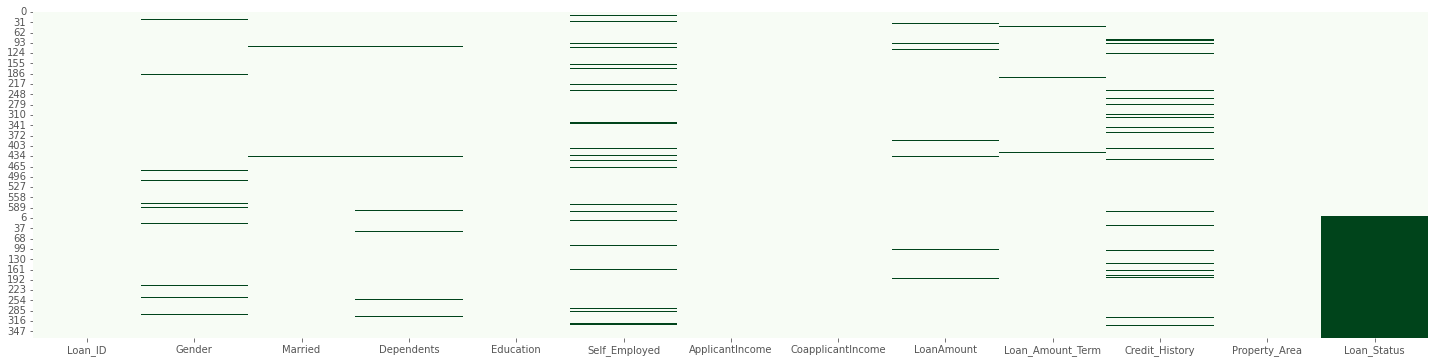

In [15]:
plt.figure(figsize=[25,6])
sns.heatmap(df.isna(), cbar= False,  cmap='Greens')

In [16]:
for i in df.columns:
    if i == 'Loan_Status':
        continue
    elif df[i].dtype == "O":
        df[i]=df[i].fillna('missing')
    else:
        df[i]=df[i].fillna(df[i].median())

In [17]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [18]:
df['Gender'].unique()

array(['Male', 'Female', 'missing'], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [20]:
#Converting categorical values into numerical values
Object_List = []
for i in df.columns:
    if df[i].dtype != "O":
        continue
    elif i == 'Loan_Status':
        continue
    else:
        Object_List.append(i)

In [21]:
Object_List

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [22]:
#Performing Label encoding on Categorical features
from sklearn.preprocessing import LabelEncoder
for i in Object_List:
    # Create a LabelEncoder object
    le = LabelEncoder()

    # Fit and transform the 'Color' column
    df[i] = le.fit_transform(df[i])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    int32  
 1   Gender             981 non-null    int32  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int32  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int32  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 80.5+ KB


In [24]:
df['Loan_Status'].unique()

array(['Y', 'N', nan], dtype=object)

In [25]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

In [26]:
df['Loan_Status'].unique()

array([ 1.,  0., nan])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    int32  
 1   Gender             981 non-null    int32  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int32  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int32  
 12  Loan_Status        614 non-null    float64
dtypes: float64(5), int32(7), int64(1)
memory usage: 80.5 KB


In [28]:
df[df['Loan_Status'].isnull()]

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          8       1        1           0          0              0   
1         11       1        1           1          0              0   
2         17       1        1           2          0              0   
3         20       1        1           2          0              0   
4         28       1        0           0          1              0   
..       ...     ...      ...         ...        ...            ...   
362      970       1        1           3          1              1   
363      972       1        1           0          0              0   
364      975       1        0           0          0              0   
365      978       1        1           0          0              0   
366      979       1        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                0.0       110.0             360.0   
1               3076             1500.0       126.0             360.0   
2               5000             1800.0       208.0             360.0   
3               2340             2546.0       100.0             360.0   
4               3276                0.0        78.0             360.0   
..               ...                ...         ...               ...   
362             4009             1777.0       113.0             360.0   
363             4158              709.0       115.0             360.0   
364             3250             1993.0       126.0             360.0   
365             5000             2393.0       158.0             360.0   
366             9200                0.0        98.0             180.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0              2          NaN  
1               1.0              2          NaN  
2               1.0              2          NaN  
3               1.0              2          NaN  
4               1.0              2          NaN  
..              ...            ...          ...  
362             1.0              2          NaN  
363             1.0              2          NaN  
364             1.0              1          NaN  
365             1.0              0          NaN  
366             1.0              0          NaN  

[367 rows x 13 columns]

In [29]:
#Feature Selection
df_test=df[df['Loan_Status'].isnull()]
df_train=df[~df['Loan_Status'].isnull()]

In [30]:
X=df_train.drop('Loan_Status',axis=1)
X=df_train.drop('Loan_ID',axis=1)

In [31]:
y=df_train['Loan_Status']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(0)
    
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
def one_model(model_to_use, metrics = False, classif = False, conf_matrix = False, model = False):
    
    '''
    here is a function that is able to return several differents metrics
    '''
    
    np.random.seed(0)
    
    global X_train, X_test,y_train, y_test
    
    model = model_to_use
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if metrics:
    
        print(f'For the model : {model_to_use} :') 
        print(f'The recall_score is : {recall_score(y_test, y_pred)}')  
        print(f'The f1_score is : {f1_score(y_test, y_pred)}') 
        print(f'The precision_score is : {precision_score(y_test, y_pred)}')  
        print(f'The accuracy_score is : {accuracy_score(y_test, y_pred)}\n')   
    
    elif classif :
        print(classification_report(y_test, y_pred))
        
    elif conf_matrix:
        # print(confusion_matrix(y_test, y_pred))
        plt.figure(figsize=[10,6])
        sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g', linewidths=1, cbar = False)
        plt.title('Confusion Matrix', size = 18);
        
    elif model :
        return model

In [37]:
lst_model = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), AdaBoostClassifier()]

In [38]:
for element in lst_model:
    one_model(element, metrics = True)

For the model : DecisionTreeClassifier() :
The recall_score is : 1.0
The f1_score is : 1.0
The precision_score is : 1.0
The accuracy_score is : 1.0

For the model : RandomForestClassifier() :
The recall_score is : 1.0
The f1_score is : 1.0
The precision_score is : 1.0
The accuracy_score is : 1.0

For the model : KNeighborsClassifier() :
The recall_score is : 0.8111111111111111
The f1_score is : 0.7724867724867724
The precision_score is : 0.7373737373737373
The accuracy_score is : 0.6504065040650406

For the model : SVC() :
The recall_score is : 1.0
The f1_score is : 0.8450704225352113
The precision_score is : 0.7317073170731707
The accuracy_score is : 0.7317073170731707

For the model : AdaBoostClassifier() :
The recall_score is : 1.0
The f1_score is : 1.0
The precision_score is : 1.0
The accuracy_score is : 1.0

